In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykat import finesse    
from pykat.commands import *  

%matplotlib inline
%config InlineBackend.figure_format='svg'
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [8]:
# Decompose ETM05_S1_finesse
aLIGO=pd.read_csv('aLIGOmeasuredmaps/ETM05_S1_finesse.txt', header=None, sep=" ", skiprows=9).dropna(axis=1).values

overlap=[]
for n in range(8):
    for m in range(-n,n+1,2):
        znm=pd.read_csv(f'Znmmaps/Z{n}{m}order1phasemap.txt', header=None, sep=" ", skiprows=9).dropna(axis=1).values
        coeff=(aLIGO*znm).sum()/((znm**2).sum())
        overlap.append(coeff)

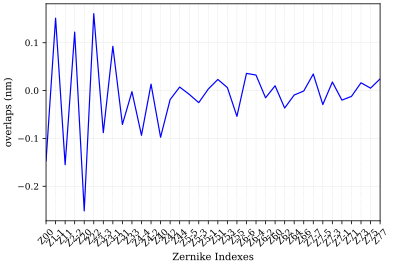

In [9]:
xticks=['Z00','Z1-1','Z11','Z2-2','Z20','Z22','Z3-3','Z3-1','Z31','Z33','Z4-4','Z4-2','Z40','Z42','Z44','Z5-5','Z5-3','Z5-1','Z51','Z53','Z55','Z6-6','Z6-4','Z6-2','Z60','Z62','Z64','Z66',
       'Z7-7','Z7-5','Z7-3','Z7-1','Z71','Z73','Z75','Z77','Z8-8','Z8-6','Z8-4','Z8-2','Z80','Z82','Z84','Z86','Z88','Z9-9','Z9-7','Z9-5','Z9-3','Z9-1','Z91','Z93','Z95','Z97','Z99','Z10-10',
       'Z10-8','Z10-6','Z10-4','Z10-2','Z10-2','Z100','Z102','Z104','Z106','Z108','Z1010','Z11-11','Z11-9','Z11-7','Z11-5','Z11-3','Z11-1','Z111','Z113','Z115','Z117','Z119','Z1111']
plt.plot(overlap)
plt.xticks(range(36), xticks, rotation=45, fontsize=9)
plt.xlabel('Zernike Indexes')
plt.ylabel('overlaps (nm)')
plt.savefig('../decomposition.pdf')
plt.show()

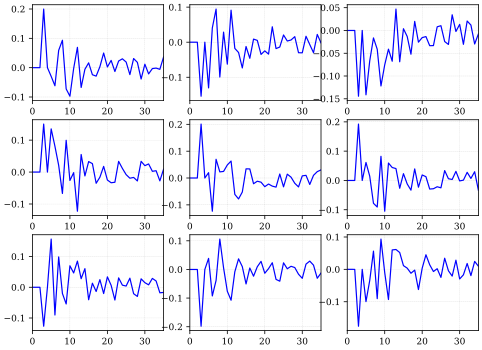

In [17]:
# The decomposition of nine random maps in the Zernike basis[nm], upto the seventh layer
# The zernike coefficients are getting smaller and smaller

overlap=[[],[],[],[],[],[],[],[],[]]
Zernike_basis = []
for n in range(8):
        for m in range(-n,n+1,2):
            znm=pd.read_csv(f'Znmmaps/Z{n}{m}order1phasemap.txt', header=None, sep=" ", skiprows=9).dropna(axis=1).values
            Zernike_basis.append(znm)

    
for i in range(18,27):
    aLIGO=pd.read_csv(f'randommaps/randommap{i}.txt', header=None, sep=" ", skiprows=9).dropna(axis=1).values
    for j in range(36):
        coeff=(aLIGO*Zernike_basis[j]).sum()/((Zernike_basis[j]**2).sum())
        overlap[i-18].append(coeff)

# xticks=['Z00','Z1-1','Z11','Z2-2','Z20','Z22','Z3-3','Z3-1','Z31','Z33','Z4-4','Z4-2','Z40','Z42',
#         'Z44','Z5-5','Z5-3','Z5-1','Z51','Z53','Z55','Z6-6','Z6-4','Z6-2','Z60','Z62','Z64','Z66']

fig, (ax1, ax2, ax3) = plt.subplots(3,3,figsize=(8,6))
ax1[0].plot(overlap[0])
ax1[1].plot(overlap[1])
ax1[2].plot(overlap[2])
ax2[0].plot(overlap[3])
ax2[1].plot(overlap[4])
ax2[2].plot(overlap[5])
ax3[0].plot(overlap[6])
ax3[1].plot(overlap[7])
ax3[2].plot(overlap[8])
#plt.xticks(range(28), xticks, rotation=45, fontsize=9)
plt.show()